In [43]:
%matplotlib notebook
import sympy as sp
import numpy as np
sp.init_printing()
import matplotlib.pyplot as plt
import ipywidgets as ipw

## Problem
This sheet is regarded as a numerical example of evaluating Energy dissipated in FPZ. The trilinear stress opening relation is given as:
\begin{gather*}
\sigma = E w; \: \mathrm{for}\; 0 \leq w \leq w_0
\end{gather*}
\begin{gather*}
\sigma = f_\mathrm{t} - (f_\mathrm{t} - \sigma_s(w_1)) \frac{w}{w_1} ; \: \mathrm{for}\; w_0 \leq w \leq w_1
\end{gather*}
\begin{gather*}
\sigma = \sigma_s \frac{w_2 - w}{w_2 - w_1} ; \: \mathrm{for}\; w_1 \leq w \leq w_2
\end{gather*}

<img src="stressopeningrelation.png" width="500"/> 

However, the parameters used in the bilinear softening curve can be evaluated by using formula by Xu. Hence,
\begin{gather*}
\sigma_s (CTOD_c) = \frac{f_t(2 - f_t \frac{CTOD_c}{G_f})}{\alpha_f} \\
w_s = CTOD_c \\
w_0 = \alpha_f \frac{G_f}{f_t} \\
\alpha_f = \lambda - \frac{d_{max}}{8} \\
\end{gather*}
where, $f_t$ represents tensile strength that can be obtained by either splitting tests or by the formula $f_t = 0.4983 \sqrt f_c$ . Here, $G_f$, $\lambda$, $\alpha_f$ represents Fracture Energy, calibration factor, deformation coefficient of concrete respectively. Furthermore, $d_{max}$ depicts maximum size of coarse aggregate and $CTOD_c$ is the critical crack tip opening displacement which can be determined by replacing $x = a_0$ in the equation for $w_x$.

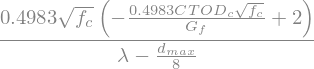

In [44]:
lamda = sp.Symbol(r'\lambda', nonnegative = True)
G_f = sp.Symbol('G_f', nonnegative = True)
d_max = sp.Symbol('d_{max}', nonnegative = True)
CTOD_c = sp.Symbol('CTOD_{c}', nonnegative = True)
f_c = sp.Symbol('f_{c}', nonnegative = True)
w_s = CTOD_c
f_t = 0.4983 * sp.sqrt(f_c)
alpha_f = lamda - d_max/8
w_0 = alpha_f * (G_f / f_t)
sigma_s = (f_t * (2 - f_t * (CTOD_c / G_f))) / alpha_f
sigma_s

### Calculating Stress for the trilinear stress opening curve

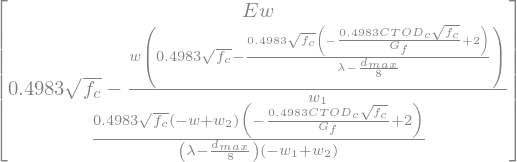

In [45]:
E = sp.Symbol(r'E', nonnegative = True)
w = sp.Symbol(r'w', nonnegative = True)
w_0 = sp.Symbol('w_0', nonnegative = True)
w_1 = sp.Symbol('w_1', nonnegative = True)
w_2 = sp.Symbol('w_2', nonnegative = True)
sigma_1 = E * w
sigma_2 = f_t - (f_t - sigma_s) * (w / w_1) 
sigma_3 = sigma_s * (w_2 - w) / (w_2 - w_1)
sigma = sp.Matrix([[sigma_1], [sigma_2], [sigma_3]])
sigma

### Critical Effective length
- Calculation of Critical Effective Length using:
\begin{gather*}
a_i = \frac{2}{\pi}(D + H_0) \arctan{\sqrt{\frac{B E C_{si}}{32.6} - 0.1135}} - H_0
\end{gather*}
where, $C_{si}$ is the secant compliance at any crack propagation. The critical effective crack length $a_c$ can be derived by setting:
\begin{gather*}
C_{si}= \frac{CMOD_c}{P_{max}}
\end{gather*}

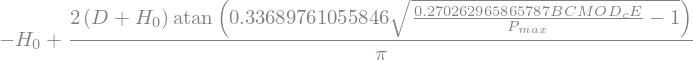

In [64]:
D = sp.Symbol('D', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
C_si = sp.Symbol('C_{si}', nonnegative = True)
CMOD_c = sp.Symbol('CMOD_c', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
C_si = CMOD_c / P_max
a_i = (2/sp.pi) * (D + H_0) * sp.atan(sp.sqrt((B*E*C_si)/(32.6)-0.1135)) - H_0
a_i

### Determining Cohesive Breaking Energy
$G_{I-cohesive}$ is defined as the average energy dissipation per unit length due to bridging cohesive action:
\begin{gather*}
G_{I-cohesive} = \frac{1}{a - a_0} \int_{a_0}^{a} \int_{0}^{w} \sigma(w_x) dw dx
\end{gather*} 
especially when crack length $a$ reaches critical effective crack propagation length $a_c$, $G_{I-cohesive}$ becomes critical cohesive crack breaking energy $G^c_{Ic}$ and is given as:
\begin{gather*}
G_{Ic} = \frac{1}{a_c - a_0} \int_{a}^{a_c} \int_{0}^{w} \sigma(w_x) dw dx
\end{gather*} 

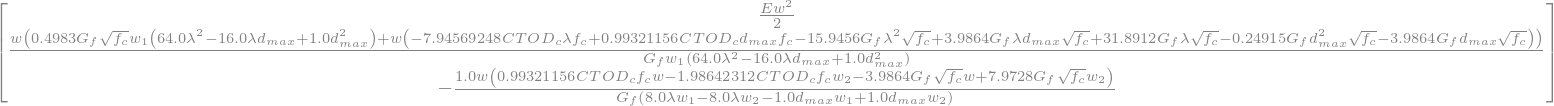

In [47]:
a_0  = sp.Symbol('a_0', nonnegative = True)
a_c  = sp.Symbol('a_c', nonnegative = True)
x = sp.Symbol('x', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
sigma_w = sp.Symbol(r'\sigma_w', nonnegative = True)
G_Ic = (1/(a_c - a_0)) * sp.integrate(sp.integrate( sigma,(w, 0, w)),(x, a_0, a_c))
G_Ic_ = sp.simplify(G_Ic)
G_Ic_

In [48]:
CMOD = np.array([0, 0.02, 0.05, 0.13, 0.15, 0.16, 0.5, 0.73])
P =  np.array([0, 1.8, 4, 7.56, 10, 8, 4, 1.8])


<IPython.core.display.Javascript object>


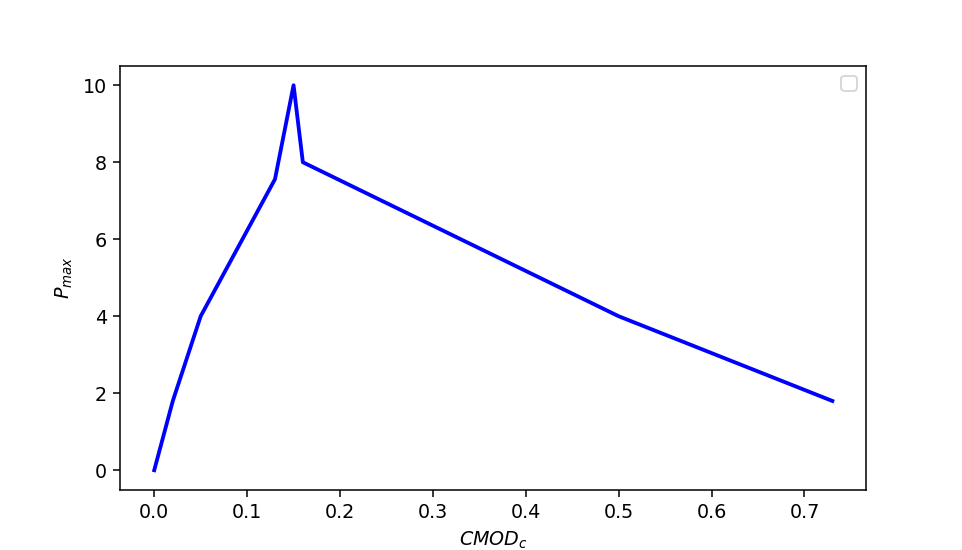

No handles with labels found to put in legend.


In [49]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
ax1.plot(CMOD, P, lw =2, color = 'b')
ax1.set_xlabel('$CMOD_c$'); ax1.set_ylabel(r'$P_{max}$')
ax1.legend()

In [50]:
params = {P_max : 10, 
          D : 2, 
          H_0 : 1, 
          B : 1.5, 
          E : 1000, 
          a_0 : 0.1, 
          CMOD_c : 0.15, 
          f_c : 45000, 
          lamda : 1, 
          d_max : 0.01,
          G_f : 100,
          CTOD_c : 0.1,
          w_2 : 0,
          w_1 : 0.2
         }

In [51]:
C_si_ = C_si.subs(params)
C_si_

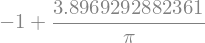

In [52]:
a_c_ = a_i.subs(params)
a_c_

\begin{gather*}
w_x = CMOD_c\left[\left(1 - \frac{x}{a_c}\right)^2 + \left(1.081 - 1.149 \left(\frac{a_c}{D}\right)\right)\left[\frac{x}{a_c} - \left(\frac{a_0}{a_c}\right)^2\right]\right]^{1/2} 
\end{gather*}

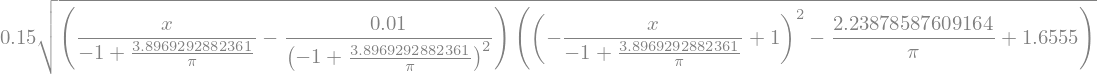

In [53]:
w_x = CMOD_c * sp.sqrt(((1 - x/a_c)**2 + (1.081 - 1.149*(a_c/D)))*(x/a_c - (a_0/a_c)**2))
w_x_ = w_x.subs(a_c,a_c_).subs(params)
w_x_

In [54]:
get_w_x = sp.lambdify((x), w_x.subs(a_c,a_c_).subs(params), 'numpy')
get_w_x

<function _lambdifygenerated(x)>

<img src="cracktipzoom.png" width="600"/> 

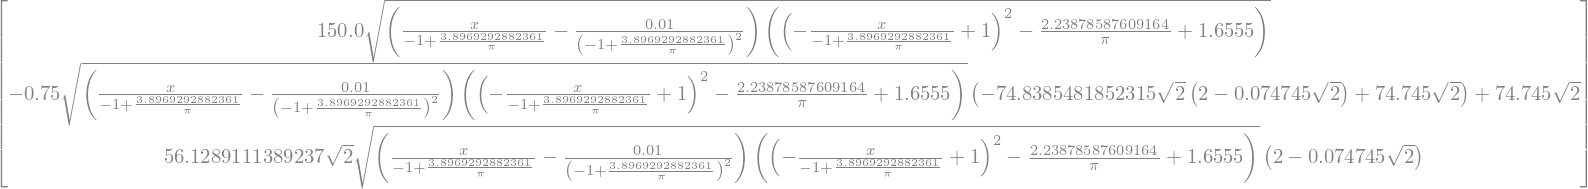

In [55]:
get_sigma = sp.lambdify((x),sigma.subs(params).subs(w, w_x_), 'numpy')
sigma.subs(params).subs(w, w_x_)

In [56]:
G_I_c_ =G_Ic_.subs(params).subs(w, w_x_)
get_G_Ic= sp.lambdify((x), G_I_c_, 'numpy')
get_G_Ic

<function _lambdifygenerated(x)>

<img src="gfdistribution.png" width="600"/> 

### Unstable Fracture Energy
The unstable fracture energy can be obtained as:
\begin{gather*}
G^{un}_{Ic} = \frac{3 P^2_{max}}{4 B^2 D^3 E} V'(\alpha)
\end{gather*}
\begin{gather*}
V(\alpha) = \left( \frac{\alpha}{1 - \alpha} \right)^2 [5.58 - 19.57 \alpha + 36.82 \alpha^2 - 34.94 \alpha^3 + 12.77 \alpha^4]
\end{gather*}
\begin{gather*}
\alpha = \frac{(a + H_0)}{(D + H_0)}
\end{gather*}

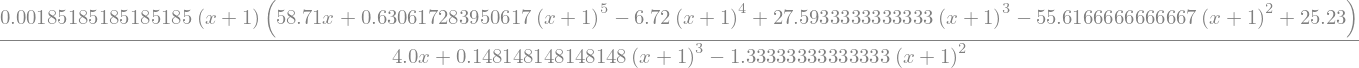

In [57]:
alpha = sp.Symbol(r'\alpha', nonnegative = True)
P = sp.Symbol(r'P', nonnegative = True)
V_alpha = (alpha / (1 - alpha))**2 * (5.58 - 19.57* alpha + 36.82 * alpha**2 - 34.94 * alpha**3 + 12.77 * alpha**4)
G_un = sp.simplify((3*P_max**2)/(4*B**2*D**3*E) * V_alpha.diff(alpha))
alpha_ = (a + H_0) / (D + H_0)
alpha_
G_un_ = G_un.subs(alpha,alpha_).subs(params).subs(a,x)
G_un_

In [58]:
get_G_un = sp.lambdify((x), G_un_, 'numpy')
get_G_un

<function _lambdifygenerated(x)>

### Initial Fracture Energy
\begin{gather*}
G^{ini}_{Ic} = \frac{3 P^2_{ini}}{4 B^2 D^3 E} V'(\alpha)
\end{gather*}
or, 
\begin{gather*}
G^{ini}_{Ic} = G^{un}_{Ic}  - G^{c}_{Ic}
\end{gather*}

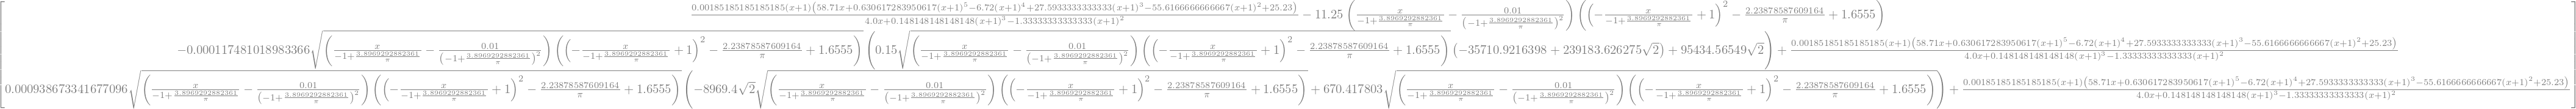

In [59]:
G_un_mat = sp.Matrix([G_un_, G_un_, G_un_])
G_ini = G_un_mat - G_I_c_
G_ini

In [60]:
get_G_ini = sp.lambdify((x), G_ini, 'numpy')
get_G_ini

<function _lambdifygenerated(x)>

In [61]:
def get_response(x=1, n_steps=8): 
    w_x_rec, G_c_rec, G_un_rec, G_ini_rec = [], [], [], [] 
    x_ = np.linspace(0.1,x,n_steps+1)
    for x_a in x_:
        w_x = get_w_x(x_a)
        G_c = get_G_Ic(x_a)
        G_un = get_G_un(x_a)
        G_ini = get_G_ini(x_a)
        w_x_rec.append(w_x)
        G_c_rec.append(G_c)
        G_un_rec.append(G_un)
        G_ini_rec.append(G_ini)
    return (
        x_, np.array(w_x_rec,dtype=np.float_),
        np.array(G_c_rec,dtype=np.float_),
        np.array(G_un_rec,dtype=np.float_),
        np.array(G_ini_rec,dtype=np.float_)
    )

<IPython.core.display.Javascript object>


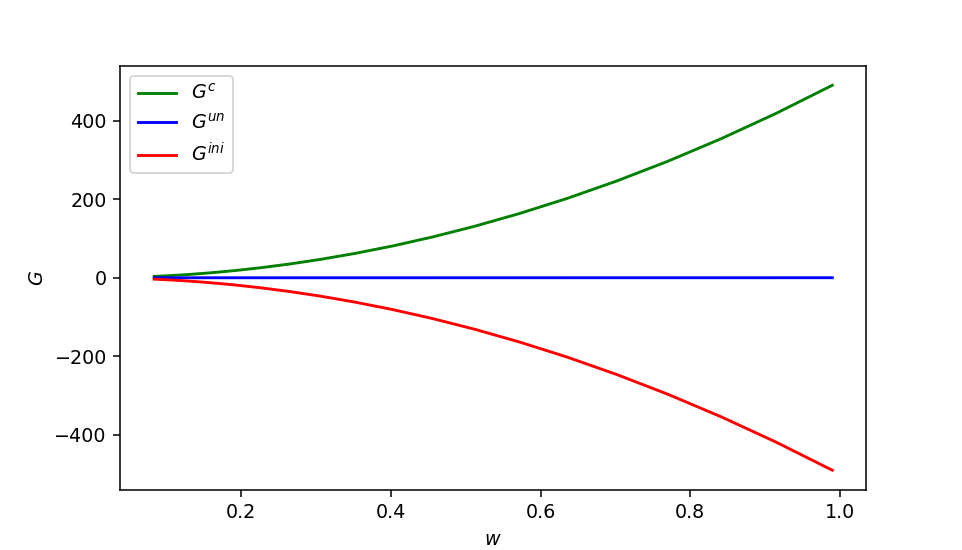

In [62]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
colors = ['blue','red', 'green', 'black', 'magenta', 'pink']
n_step_range = np.arange(1,2)*20
x = 1
for n_step, color in zip(n_step_range, colors):
    x_, w_x_arr, G_c_arr, G_un_arr, G_ini_arr = get_response(x,n_step) 
    ax1.plot(w_x_arr[:], G_c_arr[:,0,0], color='g', 
         label='$G^{c}$')
    ax1.plot(w_x_arr[:], G_un_arr[:], color='b', 
         label='$G^{un}$')
    ax1.plot(w_x_arr[:], G_ini_arr[:,0,0], color='r', 
         label='$G^{ini}$')
    ax1.set_xlabel(r'$w$'); ax1.set_ylabel(r'$G$')
    ax1.legend()